In [2]:
import configparser
import glob
import os

import pandas as pd
import pickle
import sktensor

from eval_tensor import consistent_name_d

import matplotlib.pyplot as plt
%pylab inline

pylab.rcParams['figure.figsize'] = (20, 10)
matplotlib.rcParams.update({'font.size': 14})

import logging
logging.basicConfig(level=logging.INFO, 
                    format='%(msecs)d %(levelname)-8s [%(lineno)d] %(message)s')

if not os.path.exists('cp_orth.py'):
    wget.download('http://web.stanford.edu/~vsharan/cp_orth.py')
#from cp_orth import orth_als

Populating the interactive namespace from numpy and matplotlib


In [3]:
config = configparser.ConfigParser()
config.read('config.ini')
projdir = config['DEFAULT']['ProjectDirectory']

def get_df(part=''):
    tabular = []
    mx = []
    for filen in glob.glob(os.path.join(projdir, f'tensor/{part}/ktensor_*.pkl')):
        weight, cutoff, dim = os.path.splitext(os.path.basename(filen))[0].rsplit('_', 2)
        _, weight = weight.split('_', 1)
        cutoff, dim = map(int, (cutoff, dim))
        ktensor, fit, n_iterations, exectimes = pickle.load(open(filen, mode='rb'))
        
        tabular.append((consistent_name_d[weight], cutoff, dim, ktensor.shape, fit, n_iterations, sum(exectimes)))
    df = pd.DataFrame(tabular, columns=['weight', 'cutoff', 'dim', 'shape', 'fit', 'n_iterations', 'time'])
    df['hours'] = df.time/60/60
    return df

In [9]:
df0 = get_df('0')
df0x = get_df('x0x')
df_h = get_df('0to4')
df = get_df('')

In [11]:
df_h.groupby(['cutoff', 'dim']).size()

cutoff  dim
1000    1      1
        2      1
        4      1
        8      1
        64     9
        128    9
10000   64     1
        128    1
        256    1
100000  64     1
dtype: int64

In [13]:
df.groupby(['cutoff', 'dim']).size()

cutoff  dim
10      1      1
100     1      1
        2      1
        256    9
500     256    8
1000    1      2
        2      1
        8      1
        64     1
        256    9
10000   1      1
        2      1
100000  1      1
        2      1
        64     1
dtype: int64

In [15]:
df[(df.cutoff==100)&(df.dim==256)]

,weight,cutoff,dim,shape,fit,n_iterations,time,hours
3,pmi_sali,100,256,"(34903, 22661, 21963)",0.315281,281,104357.721701,28.988256
8,iact_vanl,100,256,"(34903, 22661, 21963)",0.405969,499,178915.031582,49.698620
9,log_freq,100,256,"(34903, 22661, 21963)",0.716548,307,111169.790563,30.880497
16,pmi_vanl,100,256,"(34903, 22661, 21963)",0.282885,335,120095.118237,33.359755
17,iact_norm,100,256,"(34903, 22661, 21963)",0.415341,294,116640.154954,32.400043
23,pmi_norm,100,256,"(34903, 22661, 21963)",0.300367,499,173825.669866,48.284908
27,dice_vanl,100,256,"(34903, 22661, 21963)",0.634109,193,76447.083360,21.235301
28,dice_sali,100,256,"(34903, 22661, 21963)",0.695541,499,172303.782936,47.862162
29,iact_sali,100,256,"(34903, 22661, 21963)",0.436445,216,79773.298029,22.159249


# Complexity in rank: linear

In [126]:
def plot_dim(df2):
    df1 = df2[(df2.weight=='log_freq')&(df2.cutoff==1000)]
    plt.scatter(df1.dim, df1.time)
    #plt.xscale('log')

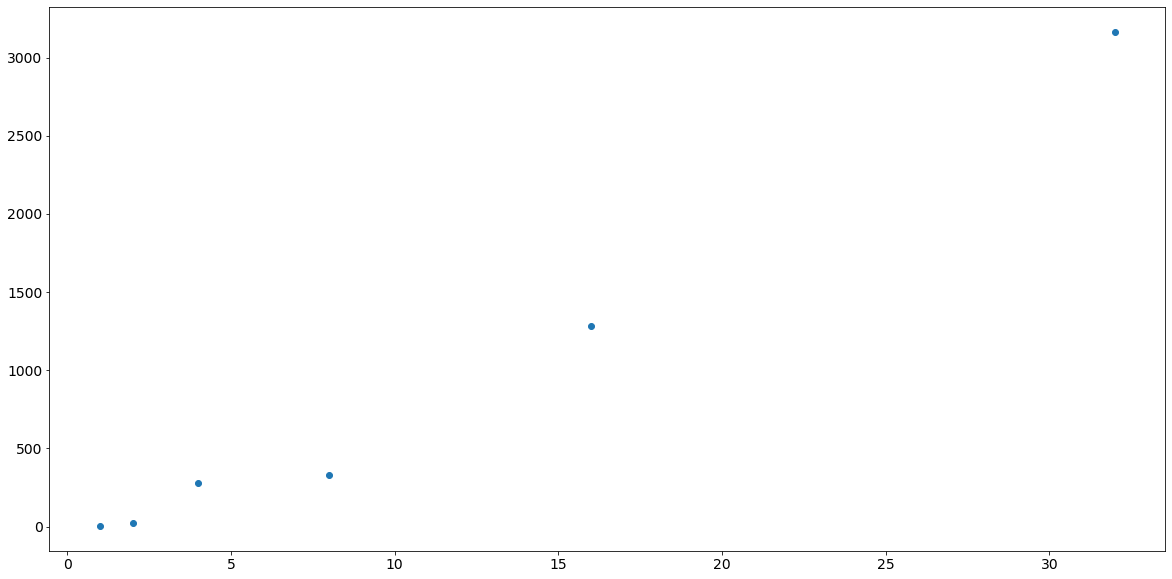

In [122]:
plot_dim(df0)

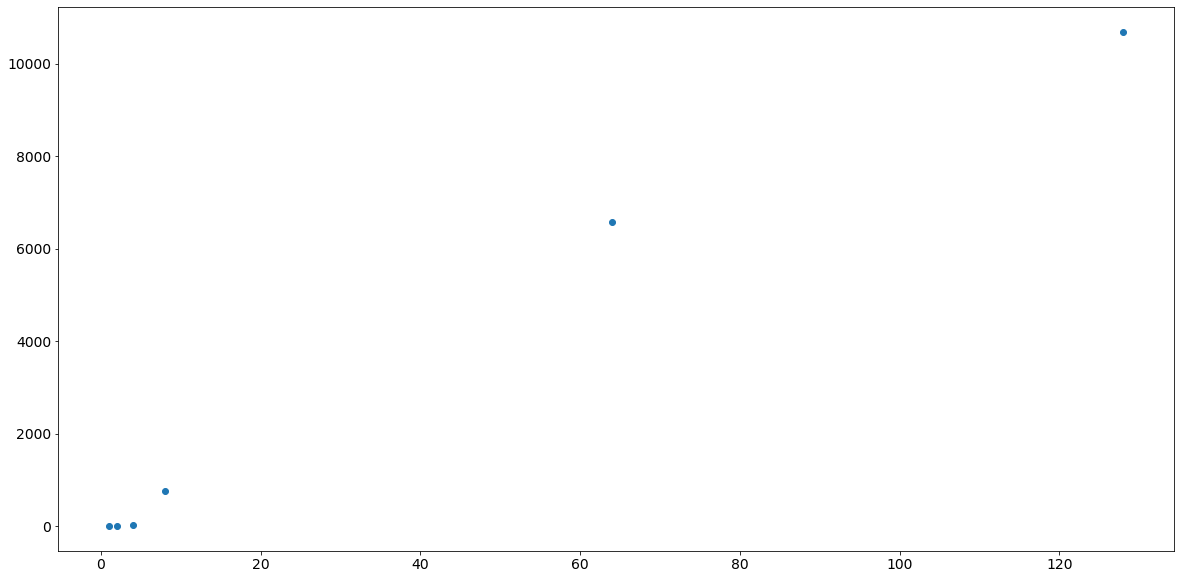

In [127]:
plot_dim(df_h)

# Complexity in cutoff: exp

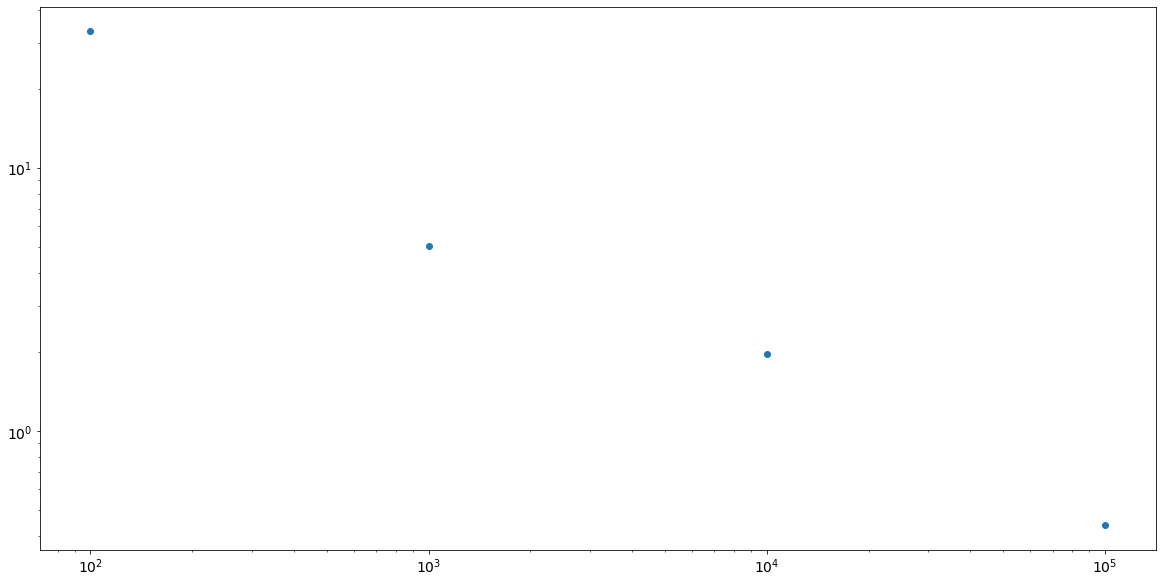

In [135]:
df1 = df[(df.weight=='log_freq')&(df.dim==2)]
plt.scatter(df1.cutoff, df1.time)
plt.xscale('log')
plt.yscale('log')

# Different weights

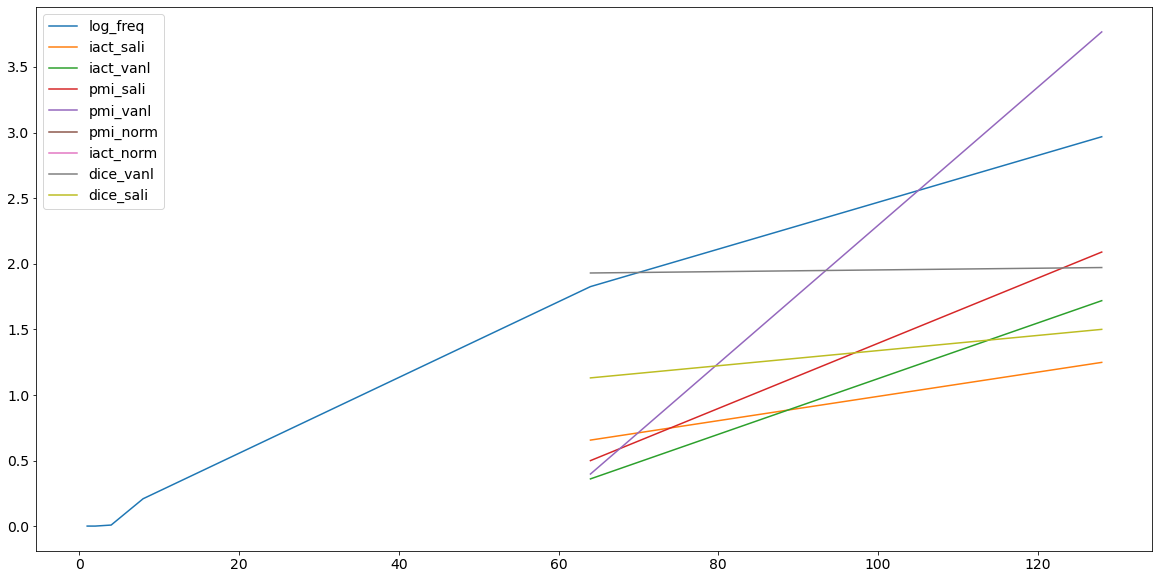

In [34]:
for weight in df.weight.unique():
    df_w = df[(df.cutoff==1000)&(df.weight==weight)].sort_values('dim')#.plot.scatter('dim', 'time')
    plt.plot(df_w.dim, df_w.time/60/60)
plt.legend(df.weight.unique())
#plt.xscale('log')